Machine Learning Coursework on Loan Prediction

LOAD NECESSARY PYTHON LIBRARIES

In [1013]:
import numpy as np
import pandas as pd
import warnings # warning filter

#plotting libraries
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

#relevant ML libraries
# from sklearn.impute import IterativeImputer
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report
# from sklearn.metrics import accuracy_score


LOAD OUR LOAN TRAINING AND TEST DATASET

In [1014]:
train = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
test = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")
ss = pd.read_csv("sample_submission.csv")

TO DISPLAY TRAIN DATA SIZE

In [1015]:
train.shape

(614, 13)

TO DISPLAY TEST DATA SIZE

In [1016]:
test.shape

(367, 12)

TO SHOW OUR TEST DATA

In [1017]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


TO DO A DATA PREPROCESSING - TO DROP THE UNWANTED COLUMN (LOAN ID)

In [1018]:
data = pd.concat([train, test])
data.drop("Loan_ID", axis=1, inplace=True)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
363,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
364,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
365,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN


TO IDENTIFY MISSING VALUES

In [1019]:
data.isnull().sum()

Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

INPUT THE MISSING VALUES

In [1020]:
for i in [data]:
    i["Gender"] = i["Gender"].fillna(data.Gender.dropna().mode()[0])
    i["Married"] = i["Married"].fillna(data.Married.dropna().mode()[0])
    i["Dependents"] = i["Dependents"].fillna(data.Dependents.dropna().mode()[0])
    i["Self_Employed"] = i["Self_Employed"].fillna(data.Self_Employed.dropna().mode()[0])
    i["LoanAmount"] = i["LoanAmount"].fillna(data.LoanAmount.dropna().mode()[0])
    i["Loan_Amount_Term"] = i["Loan_Amount_Term"].fillna(data.Loan_Amount_Term.dropna().mode()[0])
    i["Credit_History"] = i["Credit_History"].fillna(data.Credit_History.dropna().mode()[0])
    i["Loan_Status"] = i["Loan_Status"].fillna(data.Loan_Status.dropna().mode()[0])


In [1021]:
# import warnings
# warnings.filterwarnings(action='ignore', category=DeprecationWarning)
# warnings.filterwarnings(action='ignore', category=UserWarning)
# warnings.filterwarnings(action='ignore', category=FutureWarning)
# warnings.filterwarnings(action='ignore', category=RuntimeWarning)

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


from sklearn.ensemble import RandomForestRegressor
data1 = data.loc[:, ['LoanAmount', 'Loan_Amount_Term']]

imp = IterativeImputer(RandomForestRegressor(), max_iter=10, random_state=0)
data1 = pd.DataFrame(imp.fit_transform(data1), columns=data1.columns)

In [1022]:
for i in [data]:
    i["Gender"] = i["Gender"].map({"Male":0,"Female":1}).astype(int)
    i["Married"] = i["Married"].map({"No":0,"Yes":1}).astype(int)
    i["Education"] = i["Education"].map({"Not Graduate":0,"Graduate":1}).astype(int)
    i["Self_Employed"] = i["Self_Employed"].map({"No":0,"Yes":1}).astype(int)
    i["Credit_History"] = i["Credit_History"].astype(int)
   

In [1023]:
new_train = data.iloc[:614]
new_test = data.iloc[614:]

# pd.set_option('mode.chained_assignment',None)


In [1024]:
new_train["Loan_Status"] = new_train["Loan_Status"].map({"N":0,"Y":1}).astype(int)

UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='Dependents', ylabel='count'>

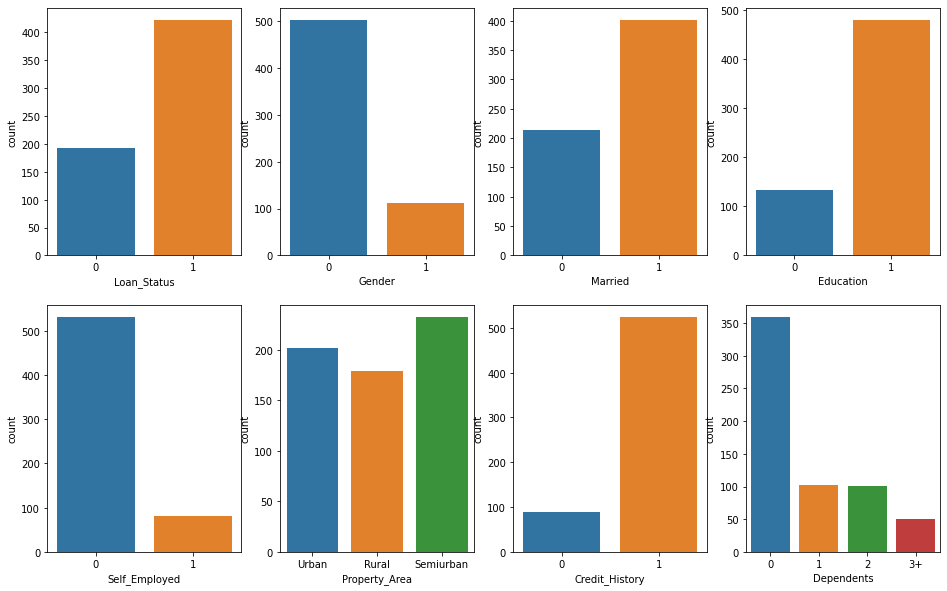

In [1025]:
fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot('Loan_Status',data=new_train,ax=ax[0][0])
sns.countplot('Gender',data=new_train,ax=ax[0][1])
sns.countplot('Married',data=new_train,ax=ax[0][2])
sns.countplot('Education',data=new_train,ax=ax[0][3])
sns.countplot('Self_Employed',data=new_train,ax=ax[1][0])
sns.countplot('Property_Area',data=new_train,ax=ax[1][1])
sns.countplot('Credit_History',data=new_train,ax=ax[1][2])
sns.countplot('Dependents',data=new_train,ax=ax[1][3])

BIVARIATE ANALYSIS

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

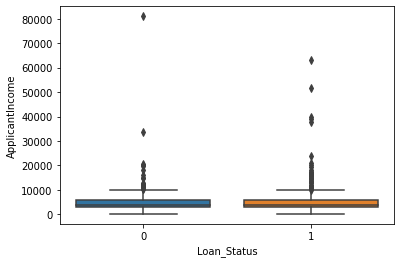

In [1026]:
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=new_train)

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

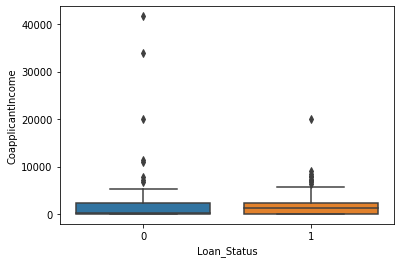

In [1027]:
sns.boxplot(x='Loan_Status',y='CoapplicantIncome',data=new_train)

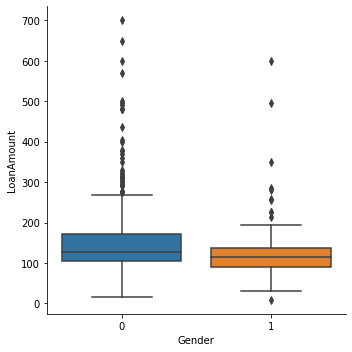

In [1028]:
sns.catplot(x='Gender',y='LoanAmount',data=new_train,kind='box')

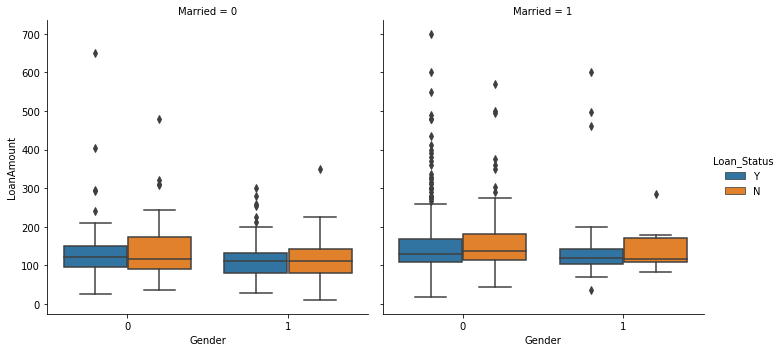

In [1029]:
sns.catplot(x='Gender',y='LoanAmount',data=data,kind='box',hue='Loan_Status', col='Married')

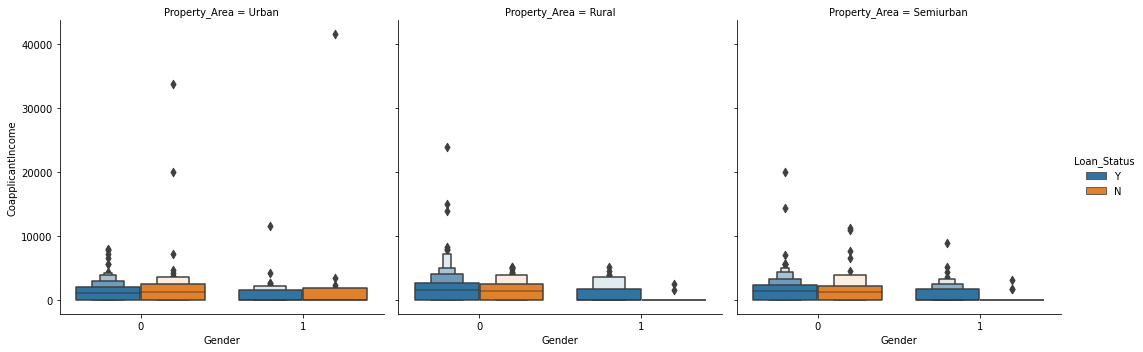

In [1030]:
sns.catplot(x='Gender',y='CoapplicantIncome',data=data,kind='boxen',hue='Loan_Status', col='Property_Area')

<function matplotlib.pyplot.show(close=None, block=None)>

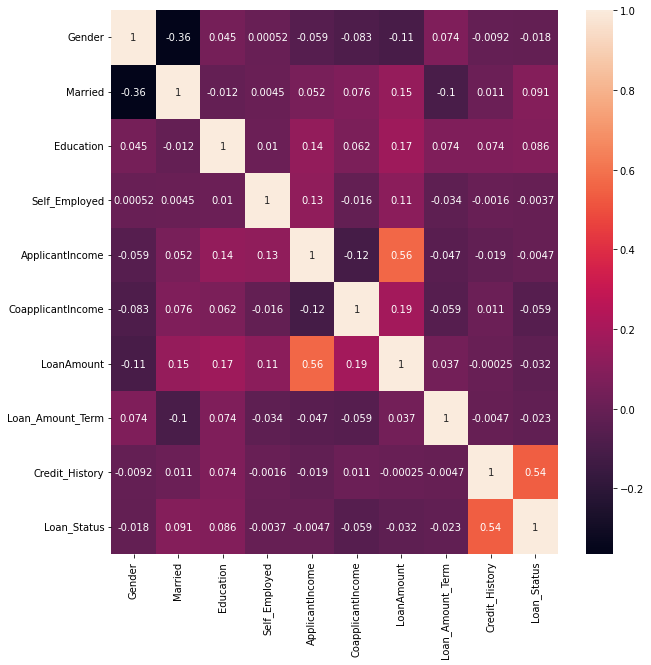

In [1031]:
# r = 0.00833
# data['EMI'] = data.apply(lambda x: (x['LoanAmount']*r*((1+r)**x['Loan_Amount_Term']))/((1+r)**((x['Loan_Amount_Term'])-1)), axis=1)
# data['Dependents_EMI_mean'] = data.groupby(['Dependents'])['EMI'].transform('mean')
# data['LoanAmount_per_TotalIncome'] = data['LoanAmount']/data['TotalIncome']
# data['Loan_Amount_Term_per_TotalIncome'] = data['Loan_Amount_Term']/data['TotalIncome']
# data['EMI_per_Loan_Amount_Term'] = data['EMI']/data['Loan_Amount_Term']
# data['EMI_per_LoanAmount'] = data['EMI']/data['LoanAmount']
# data['Property_Area_LoanAmount_per_TotalIncome_mean'] = data.groupby(['Property_Area'])['LoanAmount_per_TotalIncome'].transform('mean')
# data['Credit_History_Income_Sum'] = data.groupby(['Credit_History'])['TotalIncome'].transform('sum')
# data['Dependents_LoanAmount_Sum'] = data.groupby(['Dependents'])['LoanAmount'].transform('sum')

plt.figure(figsize = (10,10))
correlation_martrix = new_train.corr()
sns.heatmap(correlation_martrix,annot=True)
plt.show

GET TOTAL INCOME

In [1032]:
for i in [data]:
    i["TotalIncome"] = i["ApplicantIncome"]+i["CoapplicantIncome"]

i["TotalIncome"]

0      5849.0
1      6091.0
2      3000.0
3      4941.0
4      6000.0
        ...  
362    5786.0
363    4867.0
364    5243.0
365    7393.0
366    9200.0
Name: TotalIncome, Length: 981, dtype: float64

GET EQUATED MONTHLY INSTALLMENTS

In [1033]:
r = 0.00833
data['EMI'] = data.apply(lambda x: (x['LoanAmount']*r*((1+r)**x['Loan_Amount_Term']))/((1+r)**((x['Loan_Amount_Term'])-1)), axis=1)

ADDITIONAL FEATURES

In [1034]:
data['Dependents_EMI_mean'] = data.groupby(['Dependents'])['EMI'].transform('mean')

data['LoanAmount_per_TotalIncome'] = data['LoanAmount']/data['TotalIncome']

data['Loan_Amount_Term_per_TotalIncome'] = data['Loan_Amount_Term']/data['TotalIncome']

data['EMI_per_Loan_Amount_Term'] = data['EMI']/data['Loan_Amount_Term']

data['EMI_per_LoanAmount'] = data['EMI']/data['LoanAmount']

data['Property_Area_LoanAmount_per_TotalIncome_mean'] = data.groupby(['Property_Area'])['LoanAmount_per_TotalIncome'].transform('mean')

data['Credit_History_Income_Sum'] = data.groupby(['Credit_History'])['TotalIncome'].transform('sum')

data['Dependents_LoanAmount_Sum'] = data.groupby(['Dependents'])['LoanAmount'].transform('sum')


BIN INFORMATION

In [1035]:
from sklearn.preprocessing import KBinsDiscretizer

Loan_Amount_Term_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
data['Loan_Amount_Term_Bins'] = Loan_Amount_Term_discretizer.fit_transform(data['Loan_Amount_Term'].values.reshape(-1,1)).astype(float)

TotalIncome_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
data['TotalIncome_Bins'] = TotalIncome_discretizer.fit_transform(data['TotalIncome'].values.reshape(-1,1)).astype(float)

LoanAmount_per_TotalIncome_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
data['LoanAmount_per_TotalIncome_Bins'] = LoanAmount_per_TotalIncome_discretizer.fit_transform(data['LoanAmount_per_TotalIncome'].values.reshape(-1,1)).astype(float)

REMOVE UNWANTED COLUMN

In [1036]:
data=data.drop(['EMI'],axis=1)
data=data.drop(['TotalIncome'],axis=1)
data=data.drop(['LoanAmount_per_TotalIncome'],axis=1)

SIZE AFTER UNWANTED FEATURES

In [1037]:
new_train.shape

(614, 12)

ADDING MODEL

In [1038]:
x = new_train.drop("Loan_Status",axis=1)
y = new_train["Loan_Status"]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)


In [1039]:
x_train.shape

(429, 11)

In [1040]:
x_test.shape

(185, 11)

ALGORITHM FOR TRAINING

In [1041]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer

cross_val_score(model,x_train,y_train,scoring=make_scorer(accuracy_score),cv=3)

array([nan, nan, nan])

In [1042]:
pred = model.fit(x_train,y_train).predict(x_test)
accuracy_score(pred,y_test)

ValueError: could not convert string to float: '3+'

Using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
LR_parameter_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(100,800,100)),
    'solver': ['netwon-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

LR_search = GridSearchCV(LogisticRegression(), LR_parameter_grid, refit=True, verbose=3, cv=5)
LR_search.fit(x_train, y_train)
LR_search.best_params_

print('Mean Accuracy: %.3f' % LR_search.best_score_)
print('Config: %s' % LR_search.best_params_)

In [ ]:
ll = LR_search.predict(x_test)
accuracy_score(ll, y_test)

TEST DATA PREDICTION

In [ ]:
hhh = LR_search.predict(new_test)

PREPARE THE SUBMISSION FILE 

In [ ]:
dftest = pd.DataFrame(data=hhh, columns=["Loan_Status"])
finalpred = pd.concat([ss["Loan_ID"], dftest],axis=1)
finalpred["Loan_Status"]=finalpred["Loan_Status"].map({1:'Y',0:'N'})
finalpred.to_csv("finalprediction.csv", index=False)